In [165]:
# Lets first import all the required libraries for performin task1

import pandas as pd
import matplotlib.pyplot as plt

# It ia a line magic function to print the graph of matplot just below the cells
%matplotlib inline      

import seaborn as sns
import numpy as np

In [2]:
trans_data = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
# Lets select all float attributes and change its type to integer
trans_data.select_dtypes(['float','int'])

,TOT_SALES
0,6.0
1,6.3
2,2.9
3,15.0
4,13.8
...,...
264831,10.8
264832,4.4
264833,8.8
264834,7.8


In [4]:
# Lets view the changes using first 5 values
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
# To summarize or learn more about the dataset attributes and its properties
trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [10]:
trans_data.isnull().sum()  # To check is there is any null value in the dataset

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

E:\Anaconda12\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOT_SALES', ylabel='Density'>

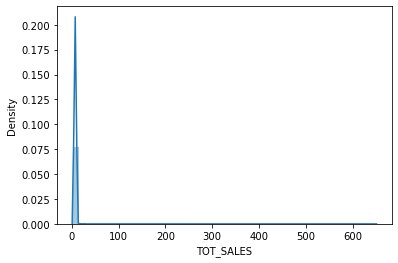

In [11]:
# Now lets check is there is any outlier in the dataset or not

sns.distplot(trans_data.TOT_SALES, kde = True)

In [12]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
print(len(trans_data))  # The total values in the customer behaviour dataset is 264836

264836


In [14]:
trans_data.info()  # To understand the format of the dataset attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# we saw that the date attribut has data types of int but it should be date format
# Now lets change it suing datetime library where timedelta is used to calculate difference in dates and perfomrm 
# manipulations on the dataset

from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in trans_data["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [6]:
# Now lets add the data format we create for DATE column in cust_behav data

trans_data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(trans_data["DATE"].dtype) # To check changed data type of date

datetime64[ns]


In [7]:
trans_data["PROD_NAME"].unique()  # Checking the unique values in  prod_name is chips or not

# We got that some of the prod are same with different names

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [8]:
split_prod_name = trans_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

# str.replace : It is used to replace all the given inout by new values
# 0-9 : 0,1,2,3,4,5,6,7,8,9 and gG will be replaced by null space
# Finally split is used to convert the vector to list
# r : REgex or regular expression

In [9]:
print(split_prod_name)

0                  [Natural, Chip, Compny, SeaSalt]
1                              [CCs, Nacho, Cheese]
2            [Smiths, Crinkle, Cut, Chips, Chicken]
3           [Smiths, Chip, Thinly, S, Cream, Onion]
4         [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
                            ...                    
264831    [Kettle, Sweet, Chilli, And, Sour, Cream]
264832                 [Tostitos, Splash, Of, Lime]
264833                          [Doritos, Mexicana]
264834     [Doritos, Corn, Chip, Mexican, Jalapeno]
264835                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, Length: 264836, dtype: object


In [10]:
# apply() takes a function and applies it to all values of pandas series

w_count = {}  # A set variable

def count_words(line):
    for word in line:
        if word not in w_count:     # If word from the list is not present then add to the present index
            w_count[word] = 1
        else:
            w_count[word] += 1      # If word from the list is present then move to next index
            
# Now we have created a set because set contains only unique values
# The set named w_count has all the uniqque product names from the given dataset
            
split_prod_name.apply(lambda line: count_words(line))  # The base code for w_count function

print(pd.Series(w_count).sort_values(ascending=False)) # To print the results stored in w_count in descending order

Chips      49770
Kettle     41288
Smiths     28860
Salt       27976
Cheese     27890
           ...  
Whlegrn     1432
Pc          1431
NCC         1419
Garden      1419
Fries       1418
Length: 198, dtype: int64


In [11]:
# Removing all the products named salsa

trans_data = trans_data[~trans_data["PROD_NAME"].str.contains(r"[Ss]alsa")]

In [24]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [25]:
print(trans_data.describe,'\n')

<bound method NDFrame.describe of              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs N

In [29]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


##checking outliers in Product quality

In [12]:
trans_data["PROD_QTY"].value_counts(bins=4).sort_index()

# We have counted the total values of the product quality for particular quality for 4 bins or splits between 1-200
# we can see that there is only two values above 50 in the column and 99.8% of the value lie between 1-50

(0.8, 50.75]       246740
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

In [13]:
trans_data.sort_values(by ='PROD_QTY', ascending = False) # Checking all the product quality column in descending order

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,2019-05-15,46,46296,42138,81,Pringles Original Crisps 134g,5,18.5
69523,2019-05-15,71,71142,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,2018-08-18,55,55144,49328,44,Thins Chips Light& Tangy 175g,5,16.5
...,...,...,...,...,...,...,...,...
150883,2018-08-14,184,184055,186586,107,Smiths Crinkle Cut French OnionDip 150g,1,2.6
150885,2019-05-17,184,184152,187227,28,Thins Potato Chips Hot & Spicy 175g,1,3.3
29682,2018-12-04,174,174004,174974,114,Kettle Sensations Siracha Lime 150g,1,4.6
150887,2019-05-17,184,184205,187584,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7


In [14]:
# As we saw above that most of the values of product quality lies between 1-50
# So, The data of PROD_QTY of 200 which are only two can be considered to be outlier and must be removed

trans_data= trans_data[trans_data['PROD_QTY'] < 6 ]

In [15]:
trans_data.sort_values(by = 'PROD_QTY', ascending = False).head() # Succesfully removed all the outliers in prodcut quality

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
80732,2019-05-18,49,49309,45816,30,Doritos Corn Chips Cheese Supreme 170g,5,22.0
17145,2018-08-16,202,202289,202104,42,Doritos Corn Chip Mexican Jalapeno 150g,5,19.5
117547,2019-05-19,81,81120,80285,46,Kettle Original 175g,5,27.0
99458,2018-08-17,138,138085,141016,40,Thins Chips Seasonedchicken 175g,5,16.5
28135,2018-08-20,51,51263,46961,3,Kettle Sensations Camembert & Fig 150g,5,23.0


In [16]:
trans_data["DATE"].describe() # Here we can see there are only 364 unique dates whihc must be 365

<ipython-input-16-9148fb5182eb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trans_data["DATE"].describe() # Here we can see there are only 364 unique dates whihc must be 365


count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [44]:
# Now lets check the date where we have no value

In [17]:
pd.date_range(start=trans_data["DATE"].min(), end=trans_data["DATE"].max()).difference(trans_data["DATE"])

# we have measured the difference between defalut days in year and dates in the given data

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [49]:
# We got to know that 2018-12-25 is the missing date in our date column

# since the date falls on christmas we can leave it as the store may be closed on the date due to christmas celebration
# Hence no anomaly is detected dut to this missing date

In [20]:
trans_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [34]:
# In above cell's output we can see that there are many alpanueric words in prodcut name but it also includes the 
# pack size information in it , so we will now use :
# str.replace: To replace all character with space

In [28]:
trans_data["PROD_NAME"] = trans_data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
trans_data["PROD_NAME"].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

In [33]:
pack_sizes = trans_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
pack_sizes.head()

# str.extract: To extract all alphanumeric words and replace the word with space in it so to get only numerical

# Ex: Natural Chip Company Seasalt175g ---> 175 = the prodcut pack size

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: 0, dtype: float64

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


<AxesSubplot:ylabel='Frequency'>

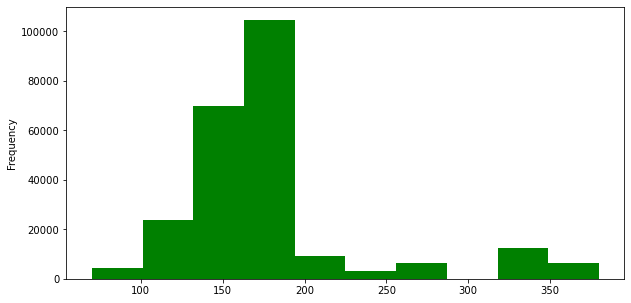

In [101]:
print(pack_sizes.describe())
pack_sizes.plot.hist(color = 'g', figsize = (10,5))

# Here we have plot a histogram for the frequency count of all prodcut sizes. We some results as :-
# lowest product size = 70
# Highest prodcut size  380
# Total products in dataset = 240676

# Frequency wise stats:-
# High Freq for :- size betn 150-200
# Lowest freq :- product size btn 280-320

In [25]:
#Lets merge our dataset of customer transaction with custmer behaviuor

cust_data = pd.read_csv('QVI_purchase_behaviour.csv')
cust_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [35]:
entire_data = pd.merge(trans_data, cust_data, on = 'LYLTY_CARD_NBR', how = 'right')
entire_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1.0,1002,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1.0,1003,3.0,52.0,Grain Waves Sour Cream&Chives g,1.0,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1.0,1003,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1.0,1004,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,OLDER SINGLES/COUPLES,Mainstream


In [45]:
entire_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

# str.split is used to convert the prodcust name to list
# str[0] extracts only first element from the list
# value_counts = To count grequency of the word in series
# sort_index = To sort results in ascending order

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

In [56]:
# By studying carefully about the above results from the product name and its count 
# We can observe that some of the product names are used twice or even more than twice with slightly different name

# Example - Dorito -- dosritos, Smith-smiths, sunbites-snbts, Natural-NCC,Grain-GrnWves and many others


# we need to fix this to get clear count of each products

In [55]:
# Here we are creating a new column in the entire_data whihc will have all prodcut name intials 
# in it which we will modify according to our need

entire_data['new_product_nm']= entire_data['PROD_NAME'].str.split().str[0]

entire_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,new_product_nm
0,2018-10-17,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium,Natural
1,2018-09-16,1.0,1002,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,YOUNG SINGLES/COUPLES,Mainstream,Red
2,2019-03-07,1.0,1003,3.0,52.0,Grain Waves Sour Cream&Chives g,1.0,3.6,YOUNG FAMILIES,Budget,Grain
3,2019-03-08,1.0,1003,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,YOUNG FAMILIES,Budget,Natural
4,2018-11-02,1.0,1004,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,OLDER SINGLES/COUPLES,Mainstream,WW


In [125]:
# How lets create a function to modfiy the names of all the product as needed
# fore ex - modify dorito to doritos

def modify_product_names(line):
    Brand = line['NEW_PROD_NAME']  # Makes list of all elements in new_product_nm
    if(Brand == 'Dorito' or Brand == 'Doritos'):
        return 'Doritos'
    elif(Brand == 'Infuzions' or Brand == 'Infzns'):
        return 'Infuzions'
    elif(Brand == 'Natural' or Brand == 'NCC'):
        return 'Natural Chip'
    elif(Brand == 'Red' or Brand == 'RRD'):
        return 'Red'
    elif(Brand == 'Sunbites' or Brand == 'Snbts'):
        return 'sunbites'
    elif(Brand == 'Smiths' or Brand == 'Smith'):
        return 'Smiths'
    elif Brand == "WW":
        return "Woolworths"
    elif Brand == "GrnWves" or Brand == "Grain":
        return "Grain Waves"
    else:
        return Brand
    

In [120]:
# Change column new_product_nm to 'NEW_PROD_NAME'

entire_data = entire_data.rename({'new_product_nm':'NEW_PROD_NAME'}, axis=1) # axis = 1

In [126]:
entire_data['NEW_PROD_NAME'] = entire_data.apply( lambda line: modify_product_names(line), axis = 1)

# Note :- axis = 0 is dataframes index and axis = 1 is column

In [128]:
# checking the new modified names
entire_data['NEW_PROD_NAME'].head()

0    Natural Chip
1             Red
2     Grain Waves
3    Natural Chip
4            None
Name: NEW_PROD_NAME, dtype: object

<AxesSubplot:>

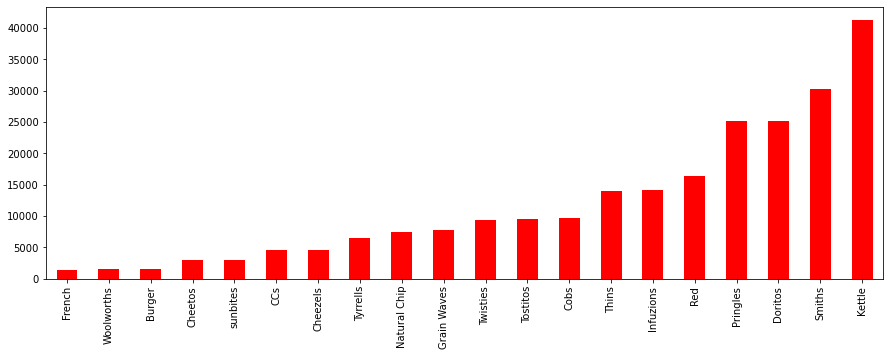

In [130]:
# Now lets plot a vertical graph for the total frequency of each products

entire_data['NEW_PROD_NAME'].value_counts(ascending = True).plot.bar(color = 'r', figsize = (15,5))

In [98]:
# From the above bar plot we get to know that 
# Lowest sold prodcut = French
# Highest sold product = Kettle
# Top lowest = french, sunbites,woolworths, burger and CCs
# Top Highest sold = Kettle, Smiths, Doritos, Pringles, Red

In [102]:
# Lets analyze the different types of customers and thier behaviour


In [115]:
# Before moving forward lets change the name of column 'PREMIUM_CUSTOMER' TO 'CUSTOMER_TYPES'

entire_data = entire_data.rename({'PREMIUM_CUSTOMER':'CUSTOMER_TYPES'},axis = 1)

In [116]:
entire_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,CUSTOMER_TYPES,NEW_PROD_NAME
0,2018-10-17,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip
1,2018-09-16,1.0,1002,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,YOUNG SINGLES/COUPLES,Mainstream,Red
2,2019-03-07,1.0,1003,3.0,52.0,Grain Waves Sour Cream&Chives g,1.0,3.6,YOUNG FAMILIES,Budget,Grain Waves
3,2019-03-08,1.0,1003,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,YOUNG FAMILIES,Budget,Natural Chip
4,2018-11-02,1.0,1004,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,OLDER SINGLES/COUPLES,Mainstream,None


In [131]:
# Now lets make a dataframe using pandas DATAFRAME which contains sum and mean of total prodcut purchased
# By different customer based on thier types and lifestage i.e :- premium,budget,maninstream 

In [137]:
cust_study = pd.DataFrame(entire_data.groupby(['LIFESTAGE','CUSTOMER_TYPES'])['TOT_SALES'].agg(['sum','mean']))

cust_study.sort_values(ascending = False,by = 'sum')

sum      mean
LIFESTAGE              CUSTOMER_TYPES                     
OLDER FAMILIES         Budget          156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream      147582.20  7.551279
RETIREES               Mainstream      145168.95  7.269352
YOUNG FAMILIES         Budget          129717.95  7.302705
OLDER SINGLES/COUPLES  Budget          127833.60  7.444305
                       Mainstream      124648.50  7.306049
                       Premium         123537.55  7.459997
RETIREES               Budget          105916.30  7.445786
OLDER FAMILIES         Mainstream       96413.55  7.281440
RETIREES               Premium          91296.65  7.461315
YOUNG FAMILIES         Mainstream       86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream       84734.25  7.637156
YOUNG FAMILIES         Premium          78571.70  7.285951
OLDER FAMILIES         Premium          75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget           57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium          54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium          39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget           33345.70  7.108442
NEW FAMILIES           Budget           20607.45  7.297256
                       Mainstream       15979.70  7.313364
                       Premium          10760.80  7.231720

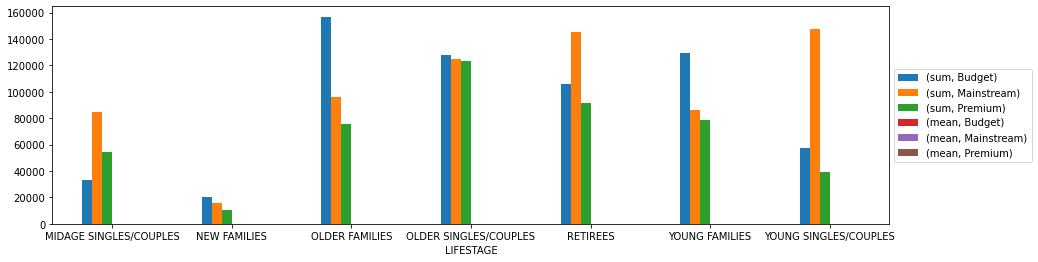

In [159]:
cust_study.unstack().plot.bar(figsize=(15,4), rot=0).legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

Text(0.5, 1.0, 'Customer Type study')

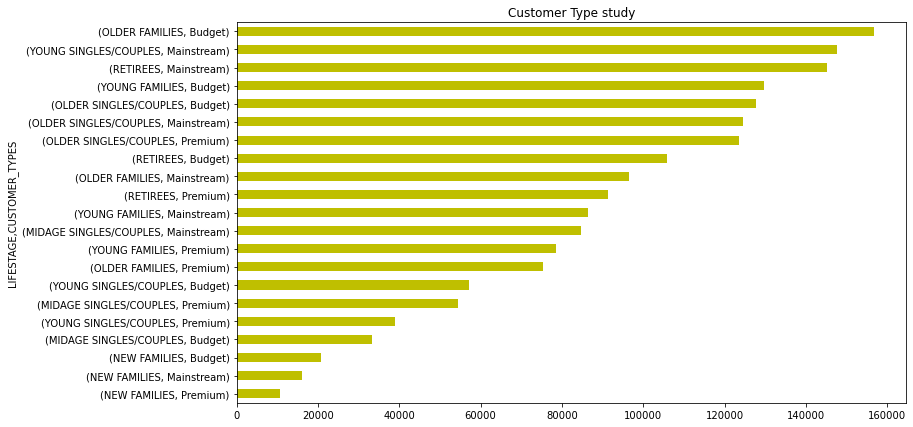

In [205]:
cust_study["sum"].sort_values().plot.barh(figsize=(12,7),color = 'y')
plt.title("Customer Type study")

In [169]:
unique_cust = entire_data.groupby(["LIFESTAGE", "CUSTOMER_TYPES"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              CUSTOMER_TYPES                
YOUNG SINGLES/COUPLES  Mainstream                8088
RETIREES               Mainstream                6479
OLDER SINGLES/COUPLES  Mainstream                4930
                       Budget                    4929
                       Premium                   4750
OLDER FAMILIES         Budget                    4675
RETIREES               Budget                    4454
YOUNG FAMILIES         Budget                    4017
RETIREES               Premium                   3872
YOUNG SINGLES/COUPLES  Budget                    3779
MIDAGE SINGLES/COUPLES Mainstream                3340
OLDER FAMILIES         Mainstream                2831
YOUNG FAMILIES         Mainstream                2728
YOUNG SINGLES/COUPLES  Premium                   2574
YOUNG FAMILIES         Premium                   2433
MIDAGE SINGLES/COUPLES Premium                   2431
OLDER FAMILIES         Premium                   2274
MIDAGE SINGLES/COUPLES Budget                    1504
NEW FAMILIES           Budget                    1112
                       Mainstream                 849
                       Premium                    588

In [171]:
freq_per_cust = entire_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "CUSTOMER_TYPES"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "CUSTOMER_TYPES"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              CUSTOMER_TYPES                 
OLDER FAMILIES         Mainstream      4.677146   2831
                       Budget          4.601925   4675
                       Premium         4.574758   2274
YOUNG FAMILIES         Premium         4.432388   2433
                       Budget          4.421957   4017
                       Mainstream      4.379399   2728
OLDER SINGLES/COUPLES  Premium         3.486316   4750
                       Budget          3.483871   4929
                       Mainstream      3.460649   4930
MIDAGE SINGLES/COUPLES Mainstream      3.321856   3340
RETIREES               Budget          3.193758   4454
                       Premium         3.160124   3872
MIDAGE SINGLES/COUPLES Premium         3.131222   2431
                       Budget          3.119016   1504
RETIREES               Mainstream      3.082266   6479
NEW FAMILIES           Mainstream      2.573616    849
                       Budget          2.539568   1112
                       Premium         2.530612    588
YOUNG SINGLES/COUPLES  Mainstream      2.416419   8088
                       Premium         2.273504   2574
                       Budget          2.268590   3779

Insights:
* Top 3 total sales contributor segment are
 1) Older families (Budget) \$156,864
 2) Young Singles/Couples (Mainstream) \$147,582
 3) Retirees (Mainstream) \$145,169
 
* Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

* Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
*Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
*The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
*Chips brand Kettle is dominating every segment as the most purchased brand.
Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
*Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

#Reccomendation

* Older Families:
  * Focus on the Budget segment
  * Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase
  * Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase

* Young Singles/Couples:
  * Focus on the Mainstream segment.
  * This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment
  * Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently

* Retirees:
  * Focus on the Mainstream segment.
  * Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.
* General:
  * All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the    preferred chip size.
  * When promoting chips in general to all segments it is good to take advantage of these two points.

In [196]:
#THANK YOU